### Imports

In [22]:
from datetime import datetime, timedelta, date
from meteostat import  Daily, Hourly
import pandas as pd 

### Data <br>
https://meteostat.net/de/place/au/austral?s=94760&t=2012-07-01/2013-06-30

In [23]:
# Get data from Karlsruhe (ID: 10727)

#Zip Codes with NO data (94760, 94752,  94736, 94757,  94764)
#Zip Codes with data (94755,94765)


# Set time period
start = datetime(2012, 7, 1)# 2012-07-01 01:00:00
end = datetime(2013, 6, 30)
# Get hourly data
df = Hourly('94755', start, end)
df = df.fetch()
#Describe 
display(df.describe().transpose(),df.head())

,count,mean,std,min,25%,50%,75%,max
temp,2893.0,16.264535,6.934001,-1.3,11.4,16.5,20.8,42.8
dwpt,2891.0,9.924732,5.475666,-4.7,5.5,10.1,14.4,22.0
rhum,2891.0,70.488066,21.691198,11.0,53.0,73.0,90.0,99.0
prcp,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snow,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wdir,2090.0,177.047847,94.509100,10.0,100.0,180.0,240.0,360.0
wspd,2907.0,8.512797,7.923866,0.0,0.0,7.6,13.0,46.4
wpgt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pres,2907.0,1017.437599,6.369860,992.1,1013.0,1017.3,1021.9,1033.9
tsun,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2012-07-01 02:00:00,13.4,5.1,57.0,NaN,NaN,340.0,14.8,NaN,1015.0,NaN,NaN
2012-07-01 05:00:00,13.4,1.4,44.0,NaN,NaN,260.0,18.4,NaN,1014.1,NaN,NaN
2012-07-01 08:00:00,9.2,1.8,60.0,NaN,NaN,280.0,13.0,NaN,1015.6,NaN,NaN
2012-07-01 11:00:00,4.2,0.2,75.0,NaN,NaN,80.0,7.6,NaN,1015.9,NaN,NaN
2012-07-01 14:00:00,1.2,0.2,93.0,NaN,NaN,NaN,0.0,NaN,1015.3,NaN,NaN


### Visulaize Data

<AxesSubplot: title={'center': 'Sydney Temperatur'}, xlabel='Time', ylabel='°C'>

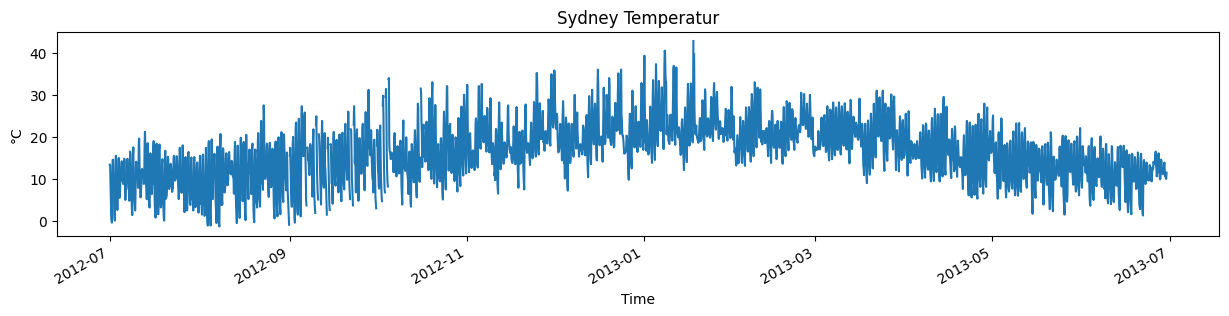

In [24]:
# Visualize Temperature
df.temp.plot(title="Sydney Temperatur",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="°C",
             kind="line"
            )

<AxesSubplot: title={'center': 'Relative Humidity'}, xlabel='Time', ylabel='%'>

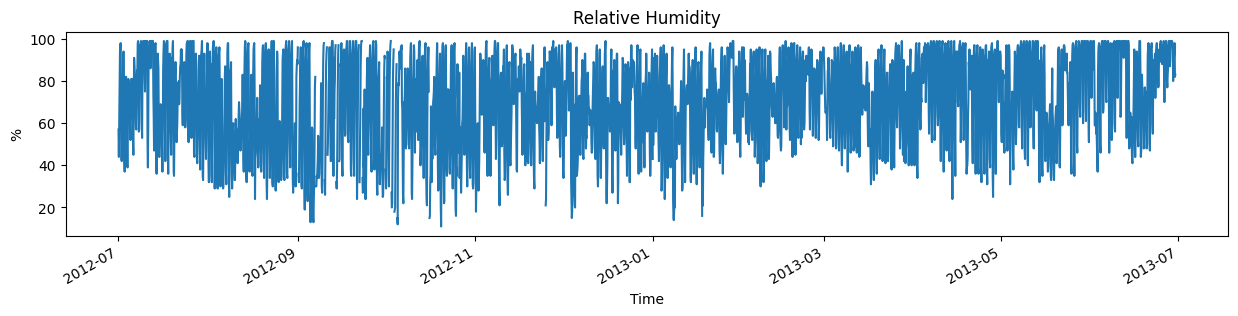

In [25]:
# Visualize Relative Humidity
df.rhum.plot(title="Relative Humidity",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="%",
             kind="line"
            )

### Process and save data to csv

In [26]:
# Delete empty rows
df.drop(['prcp', 'snow', 'wpgt', 'tsun', 'coco'], axis=1, inplace=True)

df.to_csv('Data_weather_meteostat_2012-07-01 bis 2013_06-30.csv')

In [30]:
#Check if csv worked
df_check = pd.read_csv('Data_weather_meteostat_2012-07-01 bis 2013_06-30.csv', encoding= 'unicode_escape')
df_check.time = pd.to_datetime(df_check['time'])
df_check = df_check.set_index('time', drop=True)

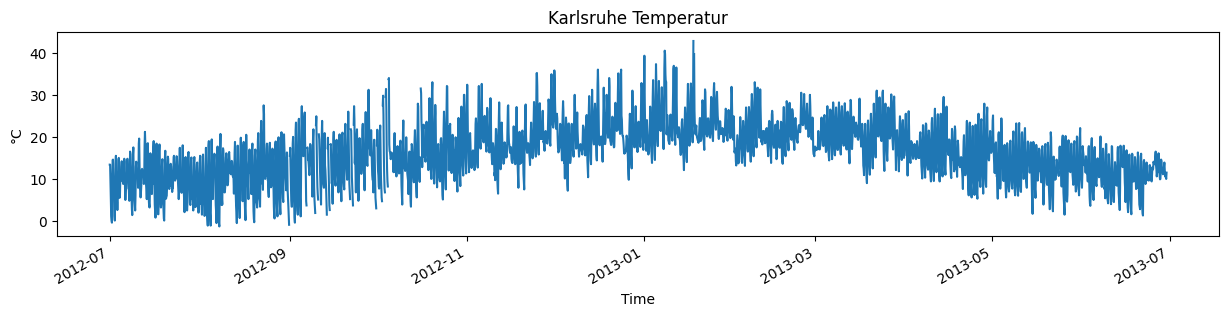

In [31]:
# Visualize Temperature
_ = df_check.temp.plot(title="Karlsruhe Temperatur",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="°C",
             kind="line"
            )